# Snapchat Political Ads
In this project, I work on data analysis and prediction based on snapchat Political Ads dataset.

# Summary of Findings


### Introduction
The datasets contains data of political ads that have been served on Snapchat’s Advertising platform in 2018 and 2019. The datasets of both years contain 34 columns, which include comprehensive infomation about political ads, such as spend, start and end date, organization name, advertiser name, and candidate ballot information.  

In this project, I answer the following questions: <br>
What are the most prevalent organizations, advertisers, and ballot candidates in the data? <br>
Are there any of them could be recognized?

In order to answer these questions, I search through the datasets to find out related information. I notice that the datasets contain **Impressions**, **OrganizationName**, **PayingAdvertiserName**, and **CandidateBallotInformation** columns. From the data in these columns, I could figure out the most prevalent organization, advertiser, and ballot candidate based on the statistics about impressions. The reason why I utilize impressions to evaluate whether organization, advertiser, and ballot candidate are prevalent is that impressions represent how often the ads are shown. This quantifies the popularity of the ads, so that I could know the prevalence of ads from this information.

Then I focus on prediction problem. At here, I try to predict how much was spent on an advertisement. I would like to utilize different features in the dataframe such as **Impressions**, **OrganizationName**, and **PayingAdvertiserName**. By combining these different features, I would like to build regression models in the project, so the problem is regression problem. The target variable is **Spend**. I try to utilize different features in the dataframe to predict the spend of advertisements. For the baseline model, I consider the spend might be related to **Impressions**, **OrganizationName**, and **PayingAdvertiserName**. In the final model, I add more information by engineering features such as **StartDate** and **CountryCode**. 

Our evaluation metric that is used for two models is mean absolute error. It could help me to clearly see the differences between predictions and actual values. By comparing the mean absolute errors of different models, I could figure out the best model which generates the perdictions that are closest to actual values.


### Cleaning and EDA

In the cleaning and EDA part, I divides my job into four parts. First, according to the requirement, I should convert **StartDate** and **EndDate** into datetime. However, it is little hard to convert since the data contains Z which is the symbol for time zone. After checking and studying, I utilized pd.to_datetime(utc = True) to convert end date and startdate successfully. I shrink the dataframe and choose the most appropriate columns -- **Impressions**, **OrganizationName**, **PayingAdvertiserName**, and **CandidateBallotInformation**.

Second, after cleaning process, I start the Univariate Analysis. In the Univariate Analysis, I utilize histogram to find out the top five organizations, advertisers and candidates based on the their frequency of occurrence in the dataframe. From this analysis, I could know that Unrestricted Minnesota is the most prevalent organization. General Election is the most prevalent candidate. The most prevalent advertiser is also Unrestricted Minnesota. Histogram gives me the most direct view of which thing is prevalent, so I plot histogram to explain the question.

Third, after Univariate Analysis, I start to work on Bivariate Analysis. In this type of analysis, I need to find out the relationship between two variables and choose suitable plot. In this part, I try to elucidate the relationship between spend and impressions. I want to figure out whether spend and impression is positive correlation. At here, I use scatter plot to show this relationship. From the result, I find out that spend and impression have positive correlation. I can have a better view of this positive correlation by ploting the linear line in the scatter plot.

Lastly, after Bivariate Analysis, I start to work on Interesting Aggregates. In this part, I grouped **CandidateBallotInformation** and **Impressions**. I find out the total impressions for each candidate, and I sort the dataframe. What is more, I follow the same procedure to find out the total impressions for each advertiser.


### Assessment of Missingness

The missing values in the **EndDate** column are "Not missing at Random (NMAR)." The missing values in this column are neither depend on other columns nor miss completely at random; instead, they depend on the value of the variable that's missing. Specifically, some ads miss the end date because they are not end yet. <br>
If I add the data of the average lasting time of ads of each organization, missingness of **EndDate** will be MAR because the average lasting time of ads could help me to predict whether the ads is end or not.

I also analyze the missingness of **CandidateBallotInformation**. By performing permutation tests, I found out that the missingness depends on **Spend** but not depends on **Segments**. From this I learn that the spends influence the prevalence of ballot candidate while segments do not, which helps us to investigate the question. In our investigation, I focus on data of spend rather than the segments.

In addition, I explore the situation that some columns have `NaN` values but may not actually have missing data. <br>
Missingness of columns that do not belongs to the scenario of Gender: End Date, CandidateBallotInformation, Regions (Included), Regions (Excluded), Electoral Districts (Included), Electoral Districts (Excluded), Radius Targeting (Included), Radius Targeting (Excluded), Metros (Included), Metros (Excluded), Postal Codes (Included), Postal Codes (Excluded), Location Categories (Included), Location Categories (Excluded), Segments, CreativeProperties. <br>
Among these columns, I assess the missingness of **Location Categories (Excluded)**. By performing test, I conclude that the missingness of this column is MAR, and it depends on data of **Location Categories (Included)**


### Hypothesis Test
Another question I want to figure out is whether there are differences between the spend of advertiser from different countries. To do this, I decide to find out whether the spend of Norway and the spend of Canada has the same distribution. To solve this problem, I utilize permutation test. I set my signiticance level as 0.05, which means if p_value is bigger than 0.05, I cannot reject my null hypothesis. If p_value is smaller than 0.05, then I will reject my hypothesis and prefer the alternative hypothesis.

**Null hypothesis**：in the population, spend of canada and norway have the same distribution. <br>
**Alternative hypothesis**: in the population, the spend of canada and norway has different distribution. 

After performing permutation test, I find out the p_value is 0 which is smaller than 0.05, so I reject the null hypothesis.


### Baseline Model
For the baseline model, I choose three features in the dataset: **Impressions** (quantitative), **OrganizationName** (nominal), and **PayingAdvertiserName** (nominal). I think these features are closely related to the spend of ads. The spends may influence the popularity of ads, which could be reflected by the data of impressions. Also, the organizations and advertisers that posted the ads may impact the spends, since different organizations and individuals spend different amount of money on ads.

In this part, I make four predictions. For the first three predictions, I use **Impressions**, **OrganizationName**, and **PayingAdvertiserName** separately to predict spends. I measure the performance by mean absolute error. It turns out that the mean absolute errors of these three predictions were large. Then I use all of the three features above to make the prediction. The performance improve, but still unsatisfactory. Therefore, I think that our model is not good. The features I used are one-sided, because I fail to comprehensively include the influencing factors, such as information about countries and dates.

### Final Model
In the model, I add **Currency Code**, **StartDate**, **Gender**, **CountryCode**, and **AgeBracket** as new features I utilized and also the combination of these features. For **StartDate**, I utilized feature engineering to extract only year and month from regular StartDate. For **CountryCode**, I utilized feature engineering to classify different countries into different continents, which become easier for me to perform OneHotEncoding. For **AgeBracket**, I utilized feature engineering to caculcate the minimum age of AgeBracket. So far I have not known whether these features are helpful or not. I think these four features are good for data for many reasons. For **Currency Code**, I think the spends has relationship with it since different currency represents different country and I could predict the spends according to the richness of one country. Same mechanism of Currency code works in **CountryCode**. For the **StartDate**, I think different month and year could influence the money that organization spend. For **Gender**, I think the spent money could correlated with gender. 

The final model is a regression model to predict the spends on ads. In order to figure out the best features, I try five different combinations of features for predictions. First, I utilize the combination of **Impressions**, **OrganizationName**, **PayingAdvertiserName**, and **Currency Code**. The result shows that the currency code feature improves the performace and leads to smaller mean absolute error than the prediction in our baseline model. Same thing happens when I try to use **StartDate** and **CountryCode** -- they could improve the model. However, when I try to use **Gender**, I find out that this feature actually make the model become worse. The mean absolute error is larger than that of baseline model. Therefore, I could conclude that **Gender** is bad for the model and prediciton. Then, same things happens on **AgeBracket** -- it is bad for the model. Last, I combine features that could improve our model -- **Impressions**, **OrganizationName**, **PayingAdvertiserName**, **Currency Code**, **StartDate**, and **CountryCode**. As a result, the combination of these features has the lowest mean absolute error, which is the best for our model.



### Fairness Evaluation
For this part, I evaluate the fairness of our model by a permutation test. First, I split the data into two groups based on the data in **Impressions**. After getting the median of impressions, I decide to use 75000 as a dividing point. If an ad has more than 75000 impressions, then it belongs to "large" group; otherwise, it belongs to "small" group. I want to figure out whether the distributions of the r2-scores are similar for large and small groups. The r2-score could help me to determine the prediction that is closest to the actual value.

**Null Hypothesis**: The distributions of r2-scores for large and small groups are similar. <br>
**Alternative Hypothesis**: No, the distributions of r2-scores for large and small groups are not similar. <br>
The significant level is 0.05.

Our p-value is around 0.35. Therefore, I cannot reject the null hypothesis. The distributions of r2-scores for large and small groups are similar.

# Code

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import sklearn.preprocessing as pp
import sklearn.tree as tr
import sklearn.ensemble as es

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

### Cleaning and EDA

In [15]:
# import two dataframe
infro2 = os.path.join('data', 'PoliticalAds_2019.csv')
df2 = pd.read_csv(infro2)
infro1 = os.path.join('data','PoliticalAds_2018.csv')
df1 = pd.read_csv(infro1)

In [16]:
# combine two dataframe and choose useful column for our question 
combined_data = pd.concat([df1,df2],axis = 0).reset_index(drop = True)
cleaned = combined_data[['Impressions','OrganizationName','CandidateBallotInformation','PayingAdvertiserName']]

In [17]:
# clean the data (convert start date and end date)
combined_data['StartDate'] = pd.to_datetime(combined_data['StartDate'], utc = True)
combined_data['EndDate'] = pd.to_datetime(combined_data['EndDate'], utc = True)

Text(0.5, 1.0, 'Organizations and Frequency of Occurence')

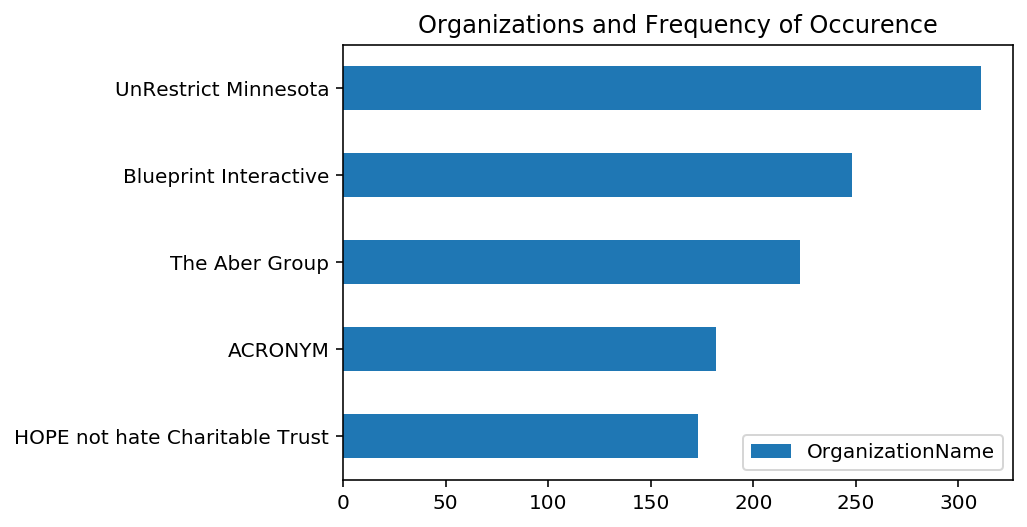

In [18]:
# frequency distribution table of organization name
Popular_Org = pd.DataFrame(cleaned['OrganizationName'].value_counts())

# The bar plot of 5 organizations with highest frequency of occurence in "OrganizationName" column
top_5_Org = Popular_Org.head().sort_values('OrganizationName', ascending = True)
Org_plot = top_5_Org.plot.barh()
Org_plot.set_title("Organizations and Frequency of Occurence")

Text(0.5, 1.0, 'Candidates and Frequency of Occurence')

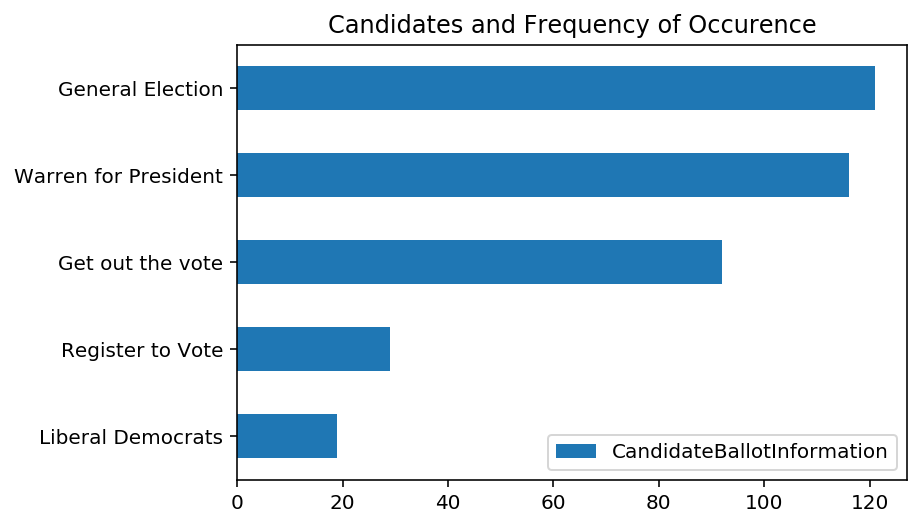

In [19]:
# frequency distribution table of Candidate.
Popular_Can = pd.DataFrame(cleaned['CandidateBallotInformation'].value_counts())

# The bar plot of 5 organizations with highest frequency of occurence in "CandidateBallotInformation" column
top_5_Can = Popular_Can.head().sort_values('CandidateBallotInformation', ascending = True)
Can_plot = top_5_Can.plot.barh()
Can_plot.set_title("Candidates and Frequency of Occurence")

Text(0.5, 1.0, 'Advertiser and Frequency of Occurence')

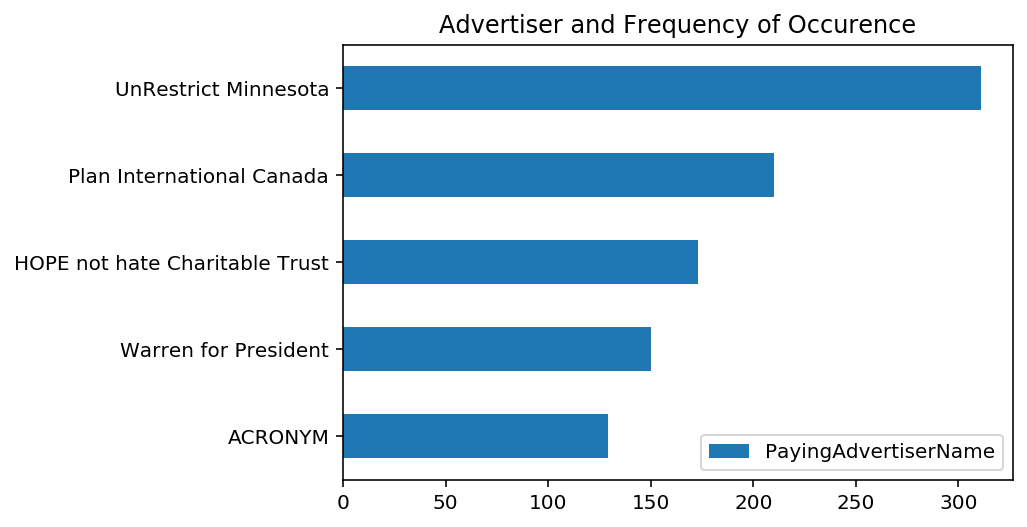

In [20]:
# frequency distribution table of Advertiser
Popular_Ad = pd.DataFrame(cleaned['PayingAdvertiserName'].value_counts())

# The bar plot of 5 organizations with highest frequency of occurence in "PayingAdvertiserName" column
top_5_Ad = Popular_Ad.head().sort_values('PayingAdvertiserName', ascending = True)
Can_plot = top_5_Ad.plot.barh()
Can_plot.set_title("Advertiser and Frequency of Occurence")

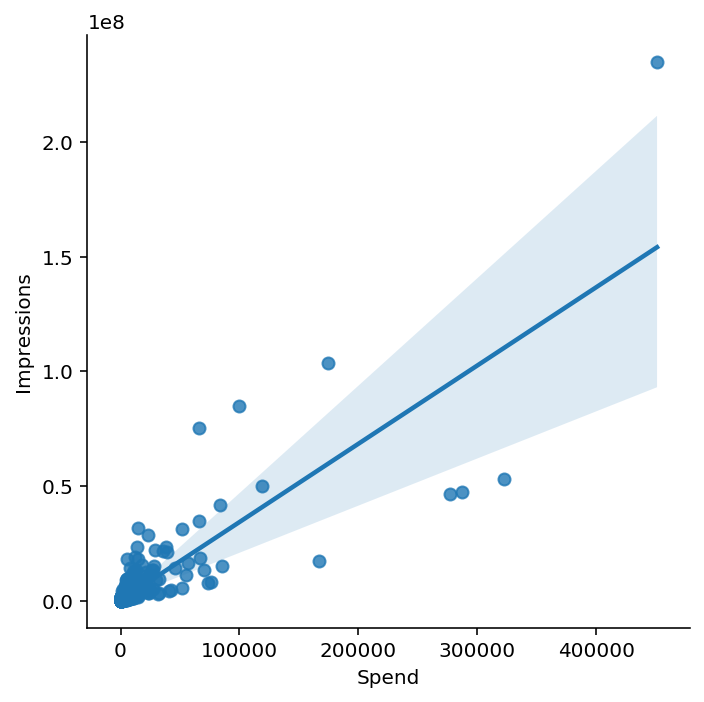

In [21]:
combined_data.columns
cleaned = cleaned.assign(Spend = combined_data['Spend'])
#cleaned.plot(kind = 'scatter', x = 'Spend', y = 'Impressions')
sns.lmplot(x='Spend',y='Impressions',data=cleaned,fit_reg=True) 

In [22]:
# calculate the impressions relate to Candidate in the dataframe
impression_Can = pd.DataFrame(cleaned.groupby('CandidateBallotInformation')['Impressions'].sum().sort_values(ascending = False))

# calculate the impressions relate to Advertiser
impression_Ad = pd.DataFrame(cleaned.groupby('PayingAdvertiserName')['Impressions'].sum().sort_values(ascending = False))

### Assessment of Missingness

Assessment of the relationship between missingness of **CandidateBallotInformation** and the data in **Spend** column:

In [23]:
from scipy.stats import ks_2samp

In [24]:
#Select two columns in the dataframe; create a new column which contains boolean values that represent 
#whether the 'CandidateBallotInformation' is null
data = combined_data
d = data[['Spend', 'CandidateBallotInformation']]
d1 = d.assign(IS_NULL = d['CandidateBallotInformation'].isna())

In [25]:
#Get observed data by KS statistic
gp1 = d1.loc[d1['IS_NULL'] == True, 'Spend']
gp2 = d1.loc[d1['IS_NULL'] == False, 'Spend']
obs_spend = ks_2samp(gp1, gp2).statistic
obs_spend

0.11814067347926333

Text(0.5, 1.0, 'The relationship between missingness of CandidateBallotInformation and the data in Spend')

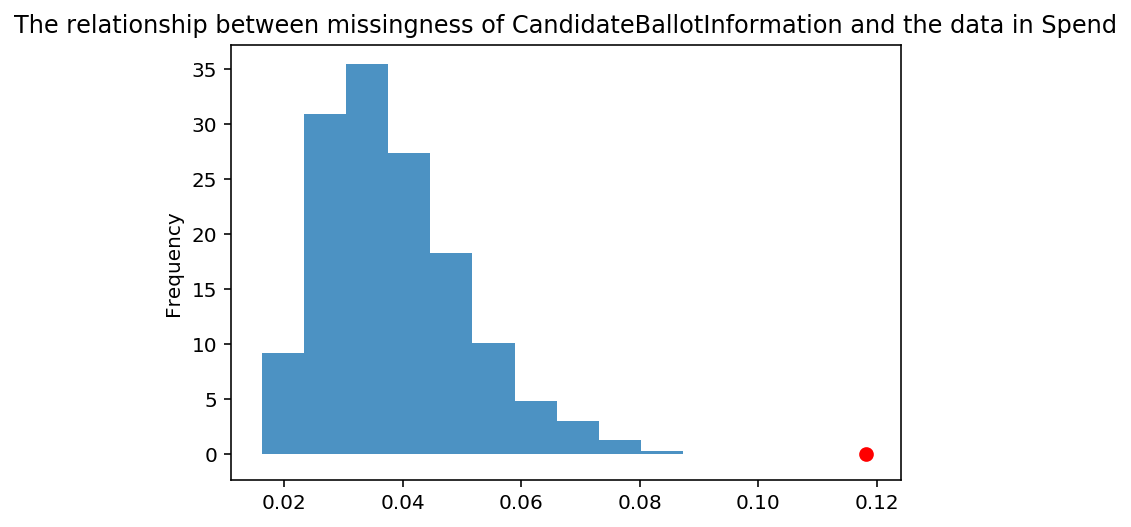

In [26]:
#Perform the permutation test
ks_list = []
for _ in range(1000):
    s = d1['IS_NULL'].sample(replace=False, frac=1).reset_index(drop=True)
    shuffled = d1.loc[:, ['Spend', 'CandidateBallotInformation']].assign(IS_NULL=s)
    grps = shuffled.groupby('IS_NULL')['Spend']
    ks = ks_2samp(grps.get_group(True), grps.get_group(False)).statistic   
    ks_list.append(ks)
    
ks_list = pd.Series(ks_list)
pval = (ks_list >= obs_spend).sum() / 1000

#Plot the result
pd.Series(ks_list).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs_spend, 0, color='red', s=40)
plt.title('The relationship between missingness of CandidateBallotInformation and the data in Spend')

Conclusion: The p value is zero, so we reject the null hypothesis. The missingness of CandidateBallotInformation depends on data in the Spend column.

Assessment of the relationship between missingness of **CandidateBallotInformation** and the data in **Segments** column:

In [27]:
#Helper method to get the tvd
def tvd_of_groups(df, col, new_col):
    cnts = df.pivot_table(index=col, columns=new_col, aggfunc='size').fillna(0)
    distr = cnts.apply(lambda x: x / x.sum())   
    return distr.diff(axis=1).iloc[:,-1].abs().sum() / 2  

Text(0.5, 1.0, 'The relationship between missingness of CandidateBallotInformation and the data in Segments')

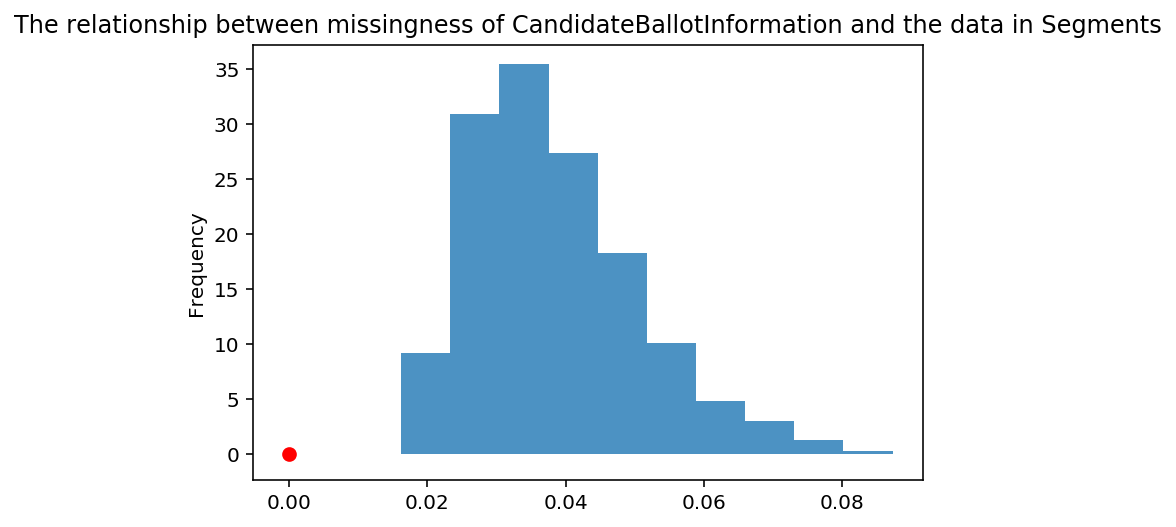

In [28]:
#Select two columns in the dataframe; create a new column which contains boolean values that represent 
#whether the 'CandidateBallotInformation' is null
d = data[['Segments', 'CandidateBallotInformation']]
d1 = d.assign(IS_NULL = d['CandidateBallotInformation'].isna())

#Get the observed data
obs = tvd_of_groups(d1, 'Segments', 'IS_NULL')

#Perform permutation test
tvds = []
for _ in range(1000):
    s = d1['IS_NULL'].sample(replace=False, frac=1).reset_index(drop=True)
    shuffled = d1.loc[:, ['Segments', 'CandidateBallotInformation']].assign(IS_NULL=s)
    tvds.append(tvd_of_groups(shuffled, 'Segments', 'IS_NULL'))
tvds = pd.Series(tvds)
pval = (tvds >= obs).sum() / 1000
pval 

#Plot the result
pd.Series(ks_list).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40)
plt.title('The relationship between missingness of CandidateBallotInformation and the data in Segments')

Conclusion: The p value is 1, so we cannot reject the null hypothesis. The missingness of CandidateBallotInformation depends on data in the Segments column.

Assessment of the relationship between missingness of **Location Categories (Excluded)** and the data in **Location Categories (Included)** column:

Text(0.5, 1.0, 'The relationship between missingness of Location Categories (Excluded) and the data in Location Categories (Included) column')

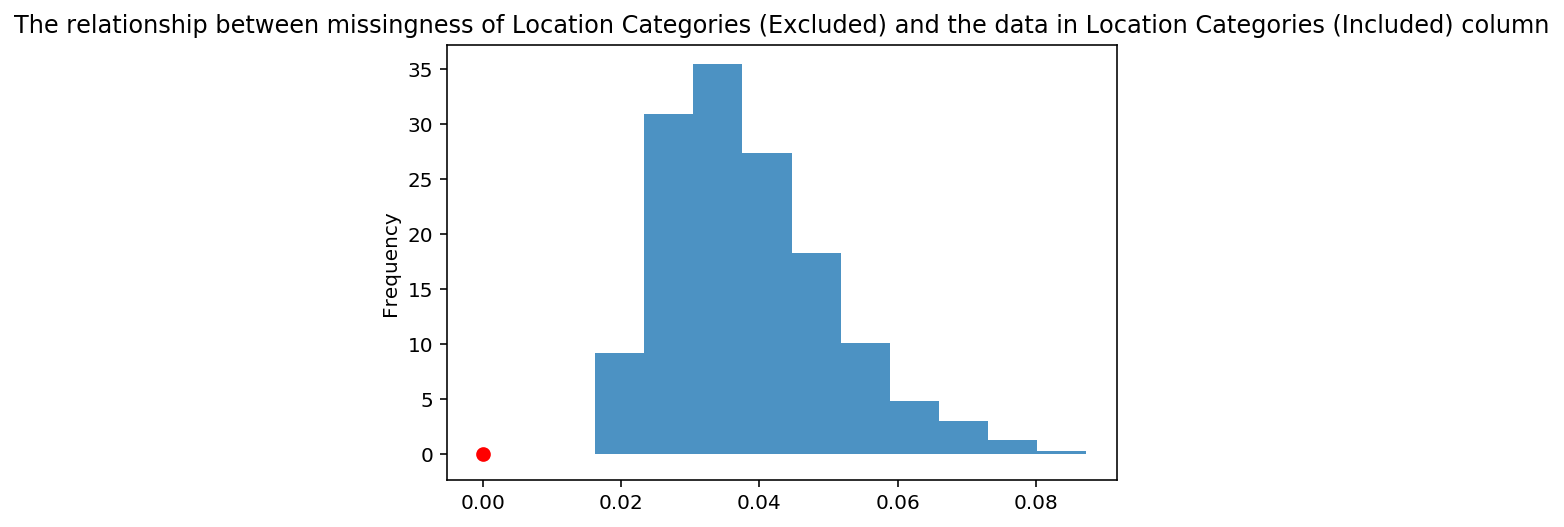

In [29]:
#Select two columns in the dataframe; create a new column which contains boolean values that represent 
#whether the 'Location Categories (Excluded)' is null
d = data[['Location Categories (Included)', 'Location Categories (Excluded)']]
d2 = d.assign(IS_NULL = d['Location Categories (Excluded)'].isna())

#Get observed data
obs_loca = tvd_of_groups(d2, 'Location Categories (Included)', 'IS_NULL')

#Perform permutation test
tvds_loca = []
for _ in range(1000):
    s = d2['IS_NULL'].sample(replace=False, frac=1).reset_index(drop=True)
    shuffled = d2.loc[:, ['Location Categories (Included)', 'Location Categories (Excluded)']].assign(IS_NULL=s)
    tvds_loca.append(tvd_of_groups(shuffled, 'Location Categories (Included)', 'IS_NULL'))
tvds_loca = pd.Series(tvds_loca)
pval = (tvds_loca >= obs_loca).sum() / 1000
pval 

#Plot the result
pd.Series(ks_list).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs_loca, 0, color='red', s=40)
plt.title('The relationship between missingness of Location Categories (Excluded) and the data in Location Categories (Included) column')

Conclusion: The p value is 0, so we reject the null hypothesis. The missingness of Location Categories (Excluded) depends on data in the Location Categories (Included) column. So missingness of Location Categories (Excluded) is MAR.

### Hypothesis Test

After solving the first question, I am interested in another question. I want to find out whether the spend of Norway and the spend of Canada has the same distribution. To solve this problem, I will utilize permutation test below.

In [30]:
# choose the dataframe that only contains norway and canada
data = combined_data[(combined_data['CountryCode'] == 'norway') | (combined_data['CountryCode'] == 'canada')]
data

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
7,7dba1320224bb29bdd58d4fd4a42d0f5473132beff36b2...,https://www.snap.com/political-ads/asset/81c5d...,CAD,141,86455,2018-07-20 23:09:54+00:00,2018-09-04 03:59:00+00:00,The Aber Group,"202-120 Eglinton Avenue East,Toronto,M4P1E2,CA",NaN,...,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,web_view_url:https://plancanada.ca/ChangeTheBi...
51,c7f0cdfd1c43a887a7cdeaa466af9911c539840885ed99...,https://www.snap.com/political-ads/asset/2109a...,CAD,4580,4289009,2018-10-05 11:47:17+00:00,2018-11-13 05:00:21+00:00,The Aber Group,"202-120 Eglinton Avenue East,Toronto,M4P1E2,CA",NaN,...,NaN,NaN,"Arts & Culture Mavens,Beauty Mavens,Bookworms ...",NaN,Provided by Advertiser,en,NaN,NaN,NaN,NaN
69,3a7afda338ff52eb953e970bc996b9c0e85fecd334da31...,https://www.snap.com/political-ads/asset/bf742...,CAD,593,359611,2018-07-20 23:09:54+00:00,2018-09-04 03:59:00+00:00,The Aber Group,"202-120 Eglinton Avenue East,Toronto,M4P1E2,CA",NaN,...,NaN,NaN,"Arts & Culture Mavens,Green Living Enthusiasts...",NaN,NaN,en,NaN,NaN,NaN,web_view_url:https://plancanada.ca/ChangeTheBi...
87,c5e9d3620ef2235d04d9822049ba736db4d99feca8327e...,https://www.snap.com/political-ads/asset/488c5...,CAD,727,215743,2018-06-25 21:13:14+00:00,2018-09-15 04:00:00+00:00,The Aber Group,"202-120 Eglinton Avenue East,Toronto,M4P1E2,CA",NaN,...,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,web_view_url:https://plancanada.ca/ChangeTheBi...
102,a2e6458100a6c1b348c7ed43d5fe434316429cd9063468...,https://www.snap.com/political-ads/asset/779b8...,EUR,200,249707,2018-11-01 15:15:30+00:00,2018-11-05 15:13:24+00:00,Norsk Studentorganisasjon,NO,NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://bevarstipendet.no/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,ea249bdacfe3c9d91c0ff5b244a69943ecaa24419821be...,https://www.snap.com/political-ads/asset/2ead2...,GBP,73,33765,2019-08-21 05:00:00+00:00,2019-09-16 21:59:00+00:00,NHO,"Postboks 5250 Majorstuen,Oslo,0303,NO",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN
4253,82c9e1b74ba59dc38784dde94a371c6914c0f9a466ccac...,https://www.snap.com/political-ads/asset/1e767...,CAD,452,274445,2019-06-04 21:25:55+00:00,2019-08-08 06:59:59+00:00,The Aber Group,"202-120 Eglinton Avenue East,Toronto,M4P1E2,CA",NaN,...,NaN,NaN,"Advocates & Activists,Beauty Mavens,Fashion & ...",NaN,NaN,en,NaN,NaN,NaN,NaN
4258,9835e3a460b0db7ce619372e5f446418706564e772a4d8...,https://www.snap.com/political-ads/asset/9614b...,CAD,2200,926029,2019-03-23 19:22:11+00:00,2019-04-09 01:00:00+00:00,DDB Edmonton Media,"Suite 1900, 10025 - 102A Avenue,Edmonton,T5J 2...",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,en,NaN,NaN,NaN,web_view_url:https://specialballot.elections.a...
4266,5bb43730c1f4b3fe4b25b1852c6149980335c2de3ff0f6...,https://www.snap.com/political-ads/asset/ef96c...,EUR,70,32192,2019-10-28 10:30:00+00:00,2019-11-04 17:00:00+00:00,T/A Opt,"Øvre Slottsgate 8,Oslo,0157,NO",NaN,...,NaN,NaN,"Do-It-Yourselfers,Investors & Entrepreneurs",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://www.fagforbundet.no/yrke/...


In [31]:
# create a new dataframe that only contains the column "CountryCode" and the column "Spend"
test_dataframe = data[['CountryCode','Spend']].reset_index(drop = True)
test_dataframe

,CountryCode,Spend
0,canada,141
1,canada,4580
2,canada,593
3,canada,727
4,norway,200
...,...,...
843,norway,73
844,canada,452
845,canada,2200
846,norway,70


In [32]:
# groupby the dataframe
s = test_dataframe.groupby('CountryCode').mean()
s

,Spend
CountryCode,
canada,2180.408521
norway,760.939866


CountryCode
canada    AxesSubplot(0.125,0.125;0.775x0.755)
norway    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Spend, dtype: object

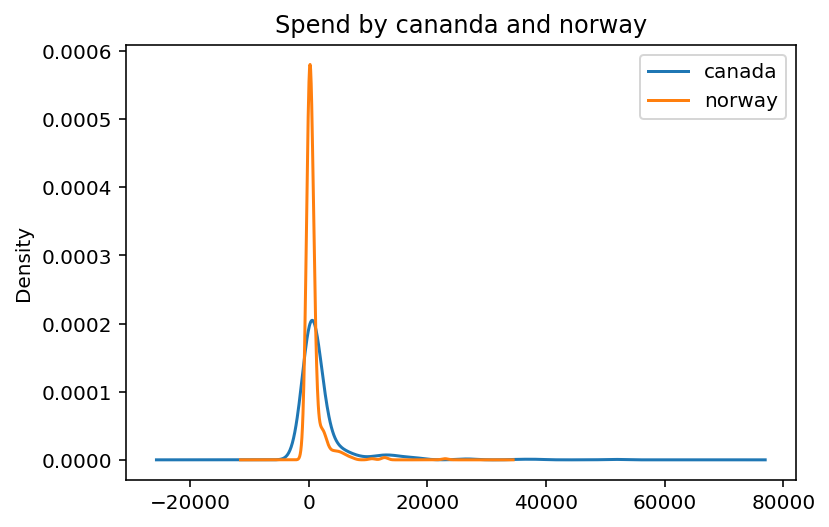

In [33]:
# from the plot, we can visualize the distribution of two countries

title='Spend by cananda and norway'

(
    test_dataframe
    .groupby('CountryCode')['Spend']
    .plot(kind='kde', legend=True, subplots=False, title=title)
)

* Null hypothesis: In the population, spend of canada and norway have the same distribution.
I.e., what we saw is due to random chance.
* Alternative hypothesis: In the population, the spend of canada and norway has different distribution.

In [34]:
# find observe difference of two mean as observe statistic
observe_data = s.iloc[0] - s.iloc[1]
observe = observe_data[0]
observe

1419.4686549335477

In [35]:
# simulation 
results = []
n = 1000
for i in range(n):
    t = test_dataframe['CountryCode'].sample(replace = False, frac = 1).reset_index(drop = True)
    test_dataframe['shuffle'] = t
    k = test_dataframe.groupby('shuffle').mean()
    test_data = (k.iloc[0] - k.iloc[1])[0]
    results.append(test_data)

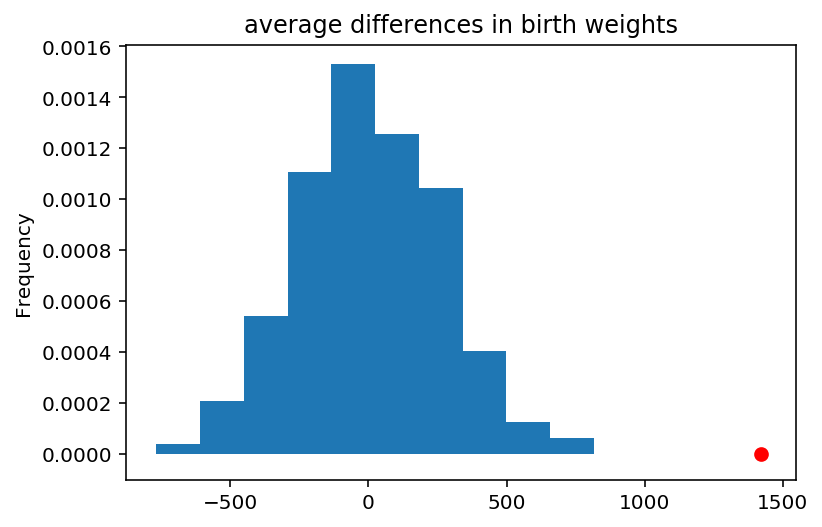

In [36]:
# histogram
title = 'average differences in birth weights'
pd.Series(results).plot(kind='hist', density=True, title=title)
plt.scatter(observe_data, 0, color='red', s=40);

In this permutation test, I set out significance level as 0.05

In [37]:
# p-value
p_value = np.count_nonzero(np.array(results) > observe)
p_value

0

From the result of our permutation test, we find out that the p-value is 0 which is smaller that the significance level. Thus, we need to reject the null hypothesis and prefer the alternative hypothesis. The spend of these two countries are not from the same distribution.

### Baseline Model

In [38]:
# Combine and clean the data
infro2 = os.path.join('data', 'PoliticalAds_2019.csv')
df2 = pd.read_csv(infro2)
infro1 = os.path.join('data','PoliticalAds_2018.csv')
df1 = pd.read_csv(infro1)
combined_data = pd.concat([df1,df2],axis = 0).reset_index(drop = True)
combined_data['StartDate'] = pd.to_datetime(combined_data['StartDate'])
combined_data['EndDate'] = pd.to_datetime(combined_data['EndDate'])
combined_data.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,6bf6eca7297551f35a5d17b478cedb6683a75c2f9b9b00...,https://www.snap.com/political-ads/asset/27e1c...,USD,4361,397340,2018-10-18 15:45:57+00:00,2018-11-06 23:00:00+00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a801fccc059ac401a54ae3bf309f3b2a22c35df0392666...,https://www.snap.com/political-ads/asset/e1b1d...,USD,11,3309,2018-09-25 05:00:00+00:00,2018-09-26 05:00:00+00:00,ACRONYM,US,NaN,...,NaN,NaN,"Cordcutters,Yoga Enthusiasts,Vegans & Organic ...",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://ourlivesourvote.com/regis...
2,a19bd9f5379e7affc4586d26537346142cc3a8a487b3a3...,https://www.snap.com/political-ads/asset/75251...,USD,205,31789,2018-10-30 17:58:01+00:00,2018-11-06 22:59:59+00:00,Mothership Strategies,"1328 Florida Avenue NW, Building C, Washington...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:http://votingmatters.org/
3,b30c9d008f67f84a14dbb79166f4f1da04d27bea85b3e4...,https://www.snap.com/political-ads/asset/60ab9...,USD,203,94877,2018-09-28 20:33:08+00:00,NaT,Chong and Koster,"1640 Rhode Island Ave. NW, Suite 600,Washingto...",NaN,...,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,web_view_url:https://act.everytown.org/sign/di...
4,dfb3bfcd72700889fd7f579bdae86a6c11f2efdede5d78...,https://www.snap.com/political-ads/asset/a72b6...,USD,558,228469,2018-10-09 15:51:44+00:00,2018-11-07 03:00:00+00:00,Penna Powers,"1706 s major street,salt lake city,84115,US",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN


In [39]:
# Extract useful columns
cleaned_data = combined_data[['Spend', 'Impressions', 'OrganizationName', 'PayingAdvertiserName']]

In [40]:
# Regressor of Impressions and Spend
lr = es.RandomForestRegressor()

# Train-test split and fit
X = cleaned_data[['Impressions']]
y = cleaned_data.Spend
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
f = lr.fit(X_train, y_train)

In [41]:
# Mean absolute error for train data
pred = lr.predict(X_train)
scr = mean_absolute_error(y_train, pred)
scr

441.56583051055475

In [42]:
# Mean absolute error for test data
pred_test = lr.predict(X_test)
scr_test = mean_absolute_error(y_test, pred_test)
scr_test

931.3384170460124

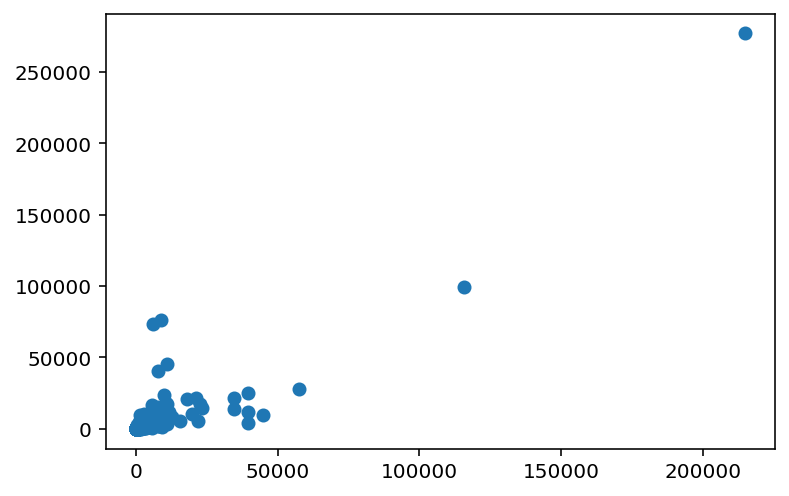

In [43]:
# The scatter plot that shows the relationship between prediction and actual value
plt.scatter(pred_test, y_test)
plt.show()

In [44]:
# Regressor of OrganizationName and Spend
org_feat = Pipeline(steps=[('org', OneHotEncoder(handle_unknown = 'ignore'))])
pl = Pipeline(steps=[('preprocessor', org_feat), ('regressor', es.RandomForestRegressor())])

In [45]:
# Train-test split and fit
X = cleaned_data[['OrganizationName']]
y = cleaned_data.Spend
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
f = pl.fit(X_train, y_train)

In [46]:
# Mean absolute error for train data
pred = pl.predict(X_train)
scr = mean_absolute_error(y_train, pred)
scr

1298.4654716139412

In [47]:
# Mean absolute error for test data
pred_test = pl.predict(X_test)
scr_test = mean_absolute_error(y_test, pred_test)
scr_test

1438.1790271549967

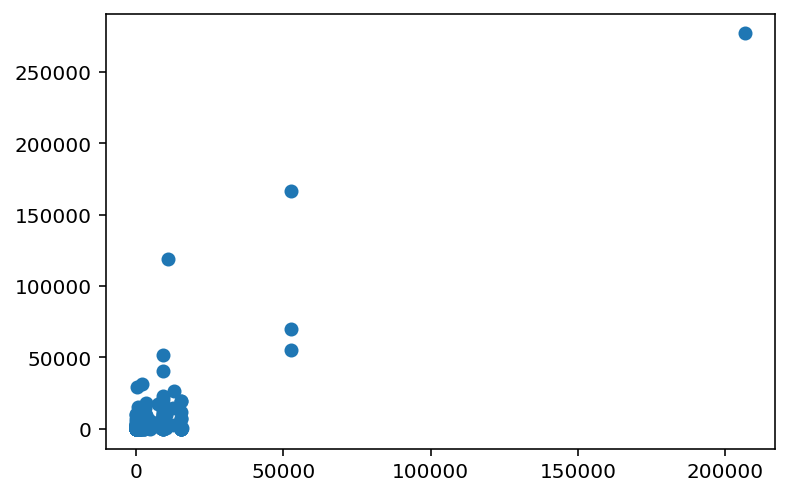

In [48]:
# The scatter plot that shows the relationship between prediction and actual value
plt.scatter(pred_test, y_test)
plt.show()

In [49]:
# Regressor of PayingAdvertiserName and Spend
adv_feat = Pipeline(steps=[('adv', OneHotEncoder(handle_unknown = 'ignore'))])
pl = Pipeline(steps=[('preprocessor', adv_feat), ('regressor', es.RandomForestRegressor())])

In [50]:
# Train-test split and fit
X = cleaned_data[['PayingAdvertiserName']]
y = cleaned_data.Spend
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
f = pl.fit(X_train, y_train)

In [51]:
# Mean absolute error for train data
pred = pl.predict(X_train)
scr = mean_absolute_error(y_train, pred)
scr

1154.232057815823

In [52]:
# Mean absolute error for test data
pred_test = pl.predict(X_test)
scr_test = mean_absolute_error(y_test, pred_test)
scr_test

1327.349716267221

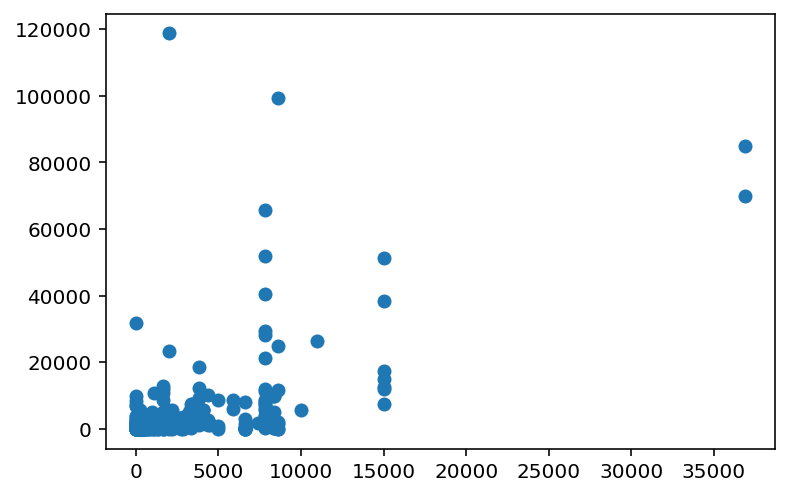

In [53]:
# The scatter plot that shows the relationship between prediction and actual value
plt.scatter(pred_test, y_test)
plt.show()

From the mean absolute errors and scatter plots of the above three predictions, we could see that the errors are pretty large; these are not good predictions.

In [54]:
# Combination of three features
impr = ['Impressions']
impr_trans = Pipeline(steps=[('impr-trans', pp.StandardScaler())])
org = ['OrganizationName']
org_trans = Pipeline(steps=[('org-trans', OneHotEncoder(handle_unknown = 'ignore'))])
adver = ['PayingAdvertiserName']
adver_trans = Pipeline(steps=[('adver-trans', OneHotEncoder(handle_unknown = 'ignore'))])
preproc = ColumnTransformer(transformers=[('impr', impr_trans, impr), ('org', org_trans, org), ('adver', adver_trans, adver)])
pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', es.RandomForestRegressor())])

In [55]:
# Train-test split and fit
X = cleaned_data[['Impressions', 'OrganizationName', 'PayingAdvertiserName']]
y = cleaned_data.Spend
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
f = pl.fit(X_train, y_train)

In [56]:
# Mean absolute error for train data
pred = pl.predict(X_train)
scr = mean_absolute_error(y_train, pred)
scr

277.39358004195117

In [57]:
# Mean absolute error for test data
pred_test = pl.predict(X_test)
scr_test = mean_absolute_error(y_test, pred_test)
scr_test

616.2291303387334

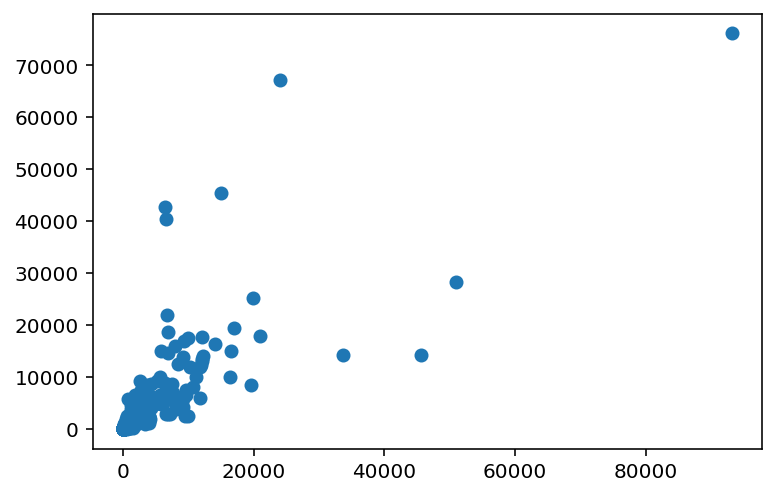

In [58]:
# The scatter plot that shows the relationship between prediction and actual value
plt.scatter(pred_test, y_test)
plt.show()

From the mean absolute errors and scatter plots of the last prediction, we could see that the result improve, but still not satisfactory. The baseline model is not good.

### Final Model

Feature engineering for **StartDate**

In [59]:
# Convert StartDate to YYYY-MM in order to figure out the impact of the starting year and month of the ads
date = combined_data['StartDate'].dt.to_period('M')
combined_data['Start_year_and_month'] = date

/Users/zhumingjia/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Feature engineering for **CountryCode**

In [60]:
north_america = ['united states', 'canada']
south_america = ['chile', 'argentina', 'brazil', 'puerto rico']
europe = ['united kingdom', 'denmark', 'sweden', 'netherlands', 'norway', 'ireland', 'switzerland', 'france', 'belgium', 'finland', 'austria', 'poland', 'lithuania','germany']
africa = ['nigeria', 'south africa']
oceania_australia = ['australia', 'new zealand']
asia = ['iraq', 'kuwait', 'united arab emirates', 'india', 'turkey']

In [61]:
# Replace the country names with the continents they belong to
def get_conti(c):
    if c in asia:
        return "Asia"
    elif c in europe:
        return "Europe"
    elif c in africa:
        return "Africa"
    elif c in oceania_australia:
        return "Oceania/Australia"
    elif c in north_america:
        return "North America"
    elif c in south_america:
        return "South America"

In [62]:
# Insert the result into combined_data
combined_data['Continent'] = combined_data['CountryCode'].apply(lambda x: get_conti(x))

Feature engineering for **AgeBracket**

In [63]:
# extract "AgeBrack" column from combined_data
ages = combined_data['AgeBracket']

# define a helper function to clean the data
def helper_age(age):
    if str(age)[-1] == '-':
        return np.nan
    return age

# Remove the values that only contain the maximum of age
ages = ages.apply(helper_age)

# Get all of the minimums of ages
ages = ages.apply(lambda x: (int(str(x)[:2]) if x is not np.nan else x))

# Get mean
age_mean = ages.mean()

# Imputation using mean
s = pd.Series([age_mean] * len(ages))
ages = ages.fillna(s)

# Add ages to original dataframe
combined_data['Age_min'] = ages

In [64]:
# Dataframe after the feature engineerings
combined_data[['Start_year_and_month', 'Continent', 'Age_min']].head()

,Start_year_and_month,Continent,Age_min
0,2018-10,North America,18.000000
1,2018-09,North America,18.000000
2,2018-10,North America,18.000000
3,2018-09,North America,18.603304
4,2018-10,North America,18.000000


Predict the spend by **Currency Code**, **Impressions**, **OrganizationName**, and **PayingAdvertiserName**

In [65]:
# Extract useful columns
cleaned1 = combined_data[['Currency Code', 'Spend', 'Impressions', 'OrganizationName', 'PayingAdvertiserName']]
cleaned1.head()

,Currency Code,Spend,Impressions,OrganizationName,PayingAdvertiserName
0,USD,4361,397340,Bully Pulpit Interactive,NextGen America
1,USD,11,3309,ACRONYM,Our Lives Our Vote
2,USD,205,31789,Mothership Strategies,Progressive Turnout Project
3,USD,203,94877,Chong and Koster,Everytown for Gun Safety AF
4,USD,558,228469,Penna Powers,Lieutenant Governor's Office


In [66]:
# Perform one-hot encoding on Currency Code column
currency = ['Currency Code']
curr_trans = Pipeline(steps=[('curr-trans', OneHotEncoder(handle_unknown='ignore'))])

# Z-scale the Impressions
impr = ['Impressions']
impr_trans = Pipeline(steps=[('impr-trans', pp.StandardScaler())])

# Perform one-hot encoding on OrganizationName column
org = ['OrganizationName']
org_trans = Pipeline(steps=[('org-trans', OneHotEncoder(handle_unknown='ignore'))])

# Perform one-hot encoding on PayingAdvertiserName column
adver = ['PayingAdvertiserName']
adver_trans = Pipeline(steps=[('adver-trans', OneHotEncoder(handle_unknown='ignore'))])

# Putting them together
preproc1 = ColumnTransformer(transformers=[('curr', curr_trans, currency), ('impr', impr_trans, impr), ('org', org_trans, org), ('adver', adver_trans, adver)])
pl1 = Pipeline(steps=[('preprocessor', preproc1), ('regressor', es.RandomForestRegressor())])

In [67]:
# Make Prediction
X1 = cleaned1.drop('Spend', axis=1)
y1 = cleaned1.Spend

# Train-test split and fit
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25)
f1 = pl1.fit(X_train1, y_train1)

In [68]:
# Mean absolute error for train data
pred1 = pl1.predict(X_train1)
scr1 = mean_absolute_error(y_train1, pred1)
scr1

282.45109340830993

In [69]:
# Mean absolute error for test data
pred_test1 = pl1.predict(X_test1)
scr_test1 = mean_absolute_error(y_test1, pred_test1)
scr_test1
# This error is lower than the error of baseline model. So Currency Code could improve prediction

769.7238987816307

Predict the spend by **Start_year_and_month**, **Impressions**, **OrganizationName**, and **PayingAdvertiserName**

In [70]:
# Extract useful columns
cleaned2 = combined_data[['Spend', 'Impressions', 'Start_year_and_month', 'OrganizationName', 'PayingAdvertiserName']]
cleaned2.head()

,Spend,Impressions,Start_year_and_month,OrganizationName,PayingAdvertiserName
0,4361,397340,2018-10,Bully Pulpit Interactive,NextGen America
1,11,3309,2018-09,ACRONYM,Our Lives Our Vote
2,205,31789,2018-10,Mothership Strategies,Progressive Turnout Project
3,203,94877,2018-09,Chong and Koster,Everytown for Gun Safety AF
4,558,228469,2018-10,Penna Powers,Lieutenant Governor's Office


In [71]:
# Perform one-hot encoding on Start_year_and_month column
date = ['Start_year_and_month']
date_trans = Pipeline(steps=[('date-trans', OneHotEncoder(handle_unknown='ignore'))])

In [72]:
# Putting them together
preproc2 = ColumnTransformer(transformers=[('date', date_trans, date), ('impr', impr_trans, impr), ('org', org_trans, org), ('adver', adver_trans, adver)])
pl2 = Pipeline(steps=[('preprocessor', preproc2), ('regressor', es.RandomForestRegressor())])

In [73]:
# Make Prediction
X2 = cleaned2.drop('Spend', axis=1)
y2 = cleaned2.Spend

# Train-test split and fit
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25)
f2 = pl2.fit(X_train2, y_train2)

In [74]:
# Mean absolute error for train data
pred2 = pl2.predict(X_train2)
scr2 = mean_absolute_error(y_train2, pred2)
scr2

232.06175287484567

In [75]:
# Mean absolute error for test data
pred_test2 = pl2.predict(X_test2)
scr_test2 = mean_absolute_error(y_test2, pred_test2)
scr_test2
# This error is lower than the error of baseline model. So start_year_and_month could improve prediction

1006.7394703217745

Predict the spend by **Age_min**, **Impressions**, **OrganizationName**, and **PayingAdvertiserName**

In [76]:
# Extract useful columns
cleaned3 = combined_data[['Age_min', 'Impressions', 'Spend', 'OrganizationName', 'PayingAdvertiserName']]
cleaned3.head()

,Age_min,Impressions,Spend,OrganizationName,PayingAdvertiserName
0,18.000000,397340,4361,Bully Pulpit Interactive,NextGen America
1,18.000000,3309,11,ACRONYM,Our Lives Our Vote
2,18.000000,31789,205,Mothership Strategies,Progressive Turnout Project
3,18.603304,94877,203,Chong and Koster,Everytown for Gun Safety AF
4,18.000000,228469,558,Penna Powers,Lieutenant Governor's Office


In [77]:
# put them together using columntransformer
preproc3 = ColumnTransformer(transformers=[('impr', impr_trans, impr), ('org', org_trans, org), ('adver', adver_trans, adver)])
pl3 = Pipeline(steps=[('preprocessor', preproc3), ('regressor', es.RandomForestRegressor())])

In [78]:
# Make Prediction
X3 = cleaned3.drop('Spend', axis=1)
y3 = cleaned3.Spend

# Train-test split and fit
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25)
f3 = pl3.fit(X_train3, y_train3)

In [79]:
# Mean absolute error for train data
pred3 = pl3.predict(X_train3)
scr3 = mean_absolute_error(y_train3, pred3)
scr3

300.4167249817765

In [80]:
# Mean absolute error for test data
pred_test3 = pl3.predict(X_test3)
scr_test3 = mean_absolute_error(y_test3, pred_test3)
scr_test3
# This error is larger than the error of baseline model. So age_min cannot improve prediction

651.478384879725

Predict the spend by **Gender**, **Impressions**, **OrganizationName**, and **PayingAdvertiserName**

In [81]:
# First fill all NaNs with 'All genders'
combined_data['Gender'] = combined_data['Gender'].replace(np.nan, 'All genders')
combined_data.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties,Start_year_and_month,Continent,Age_min
0,6bf6eca7297551f35a5d17b478cedb6683a75c2f9b9b00...,https://www.snap.com/political-ads/asset/27e1c...,USD,4361,397340,2018-10-18 15:45:57+00:00,2018-11-06 23:00:00+00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10,North America,18.000000
1,a801fccc059ac401a54ae3bf309f3b2a22c35df0392666...,https://www.snap.com/political-ads/asset/e1b1d...,USD,11,3309,2018-09-25 05:00:00+00:00,2018-09-26 05:00:00+00:00,ACRONYM,US,NaN,...,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://ourlivesourvote.com/regis...,2018-09,North America,18.000000
2,a19bd9f5379e7affc4586d26537346142cc3a8a487b3a3...,https://www.snap.com/political-ads/asset/75251...,USD,205,31789,2018-10-30 17:58:01+00:00,2018-11-06 22:59:59+00:00,Mothership Strategies,"1328 Florida Avenue NW, Building C, Washington...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:http://votingmatters.org/,2018-10,North America,18.000000
3,b30c9d008f67f84a14dbb79166f4f1da04d27bea85b3e4...,https://www.snap.com/political-ads/asset/60ab9...,USD,203,94877,2018-09-28 20:33:08+00:00,NaT,Chong and Koster,"1640 Rhode Island Ave. NW, Suite 600,Washingto...",NaN,...,NaN,NaN,en,NaN,NaN,NaN,web_view_url:https://act.everytown.org/sign/di...,2018-09,North America,18.603304
4,dfb3bfcd72700889fd7f579bdae86a6c11f2efdede5d78...,https://www.snap.com/political-ads/asset/a72b6...,USD,558,228469,2018-10-09 15:51:44+00:00,2018-11-07 03:00:00+00:00,Penna Powers,"1706 s major street,salt lake city,84115,US",NaN,...,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,2018-10,North America,18.000000


In [82]:
# Extract useful columns
cleaned4 = combined_data[['Spend', 'Impressions', 'Gender', 'OrganizationName', 'PayingAdvertiserName']]
cleaned4.head()

,Spend,Impressions,Gender,OrganizationName,PayingAdvertiserName
0,4361,397340,All genders,Bully Pulpit Interactive,NextGen America
1,11,3309,All genders,ACRONYM,Our Lives Our Vote
2,205,31789,All genders,Mothership Strategies,Progressive Turnout Project
3,203,94877,All genders,Chong and Koster,Everytown for Gun Safety AF
4,558,228469,All genders,Penna Powers,Lieutenant Governor's Office


In [83]:
# Perform one-hot encoding on Gender column
gender = ['Gender']
gender_trans = Pipeline(steps=[('gender-trans', OneHotEncoder(handle_unknown='ignore'))])

In [84]:
# Putting them together
preproc4 = ColumnTransformer(transformers=[('gender', gender_trans, gender), ('impr', impr_trans, impr), ('org', org_trans, org), ('adver', adver_trans, adver)])
pl4 = Pipeline(steps=[('preprocessor', preproc4), ('regressor', es.RandomForestRegressor())])

In [85]:
# Make Prediction
X4 = cleaned4.drop('Spend', axis=1)
y4 = cleaned4.Spend

# Train-test split and fit
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25)
f4 = pl4.fit(X_train4, y_train4)

In [86]:
# Mean absolute error for train data
pred4 = pl4.predict(X_train4)
scr4 = mean_absolute_error(y_train4, pred4)
scr4

279.6758934856667

In [87]:
# Mean absolute error for test data
pred_test4 = pl4.predict(X_test4)
scr_test4 = mean_absolute_error(y_test4, pred_test4)
scr_test4
# This error is larger than the error of baseline model. So Gender cannot improve prediction

911.7929519346632

Predict the spend by **Continent**, **Impressions**, **OrganizationName**, and **PayingAdvertiserName**

In [88]:
# Extract useful columns
cleaned5 = combined_data[['Spend', 'Impressions', 'Continent', 'OrganizationName', 'PayingAdvertiserName']]
cleaned5.head()

,Spend,Impressions,Continent,OrganizationName,PayingAdvertiserName
0,4361,397340,North America,Bully Pulpit Interactive,NextGen America
1,11,3309,North America,ACRONYM,Our Lives Our Vote
2,205,31789,North America,Mothership Strategies,Progressive Turnout Project
3,203,94877,North America,Chong and Koster,Everytown for Gun Safety AF
4,558,228469,North America,Penna Powers,Lieutenant Governor's Office


In [89]:
# One-hot encoding for continent
conti = ['Continent']
cont_trans = Pipeline(steps=[('cont-trans', OneHotEncoder(handle_unknown='ignore'))])

In [90]:
# Putting them together
preproc5 = ColumnTransformer(transformers=[('cont', cont_trans, conti), ('impr', impr_trans, impr), ('org', org_trans, org), ('adver', adver_trans, adver)])
pl5 = Pipeline(steps=[('preprocessor', preproc5), ('regressor', es.RandomForestRegressor())])

In [91]:
# Make Prediction
X5 = cleaned5.drop('Spend', axis=1)
y5 = cleaned5.Spend

# Train-test split and fit
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.25)
f5 = pl5.fit(X_train5, y_train5)

In [92]:
# Mean absolute error for train data
pred5 = pl5.predict(X_train5)
scr5 = mean_absolute_error(y_train5, pred5)
scr5

268.16185202540873

In [93]:
# Mean absolute error for test data
pred_test5 = pl5.predict(X_test5)
scr_test5 = mean_absolute_error(y_test5, pred_test5)
scr_test5
# This error is lower than the error of baseline model. So continent improves prediction

1079.006887222743

Predict the spend by **Currency Code**, **Continent**, **Start_year_and_month**, **Impressions**, **OrganizationName**, and **PayingAdvertiserName**

In [94]:
# Extract useful columns
cleaned6 = combined_data[['Currency Code', 'Spend', 'Impressions', 'Start_year_and_month', 'OrganizationName', 'PayingAdvertiserName', 'Continent']]
cleaned6.head()

,Currency Code,Spend,Impressions,Start_year_and_month,OrganizationName,PayingAdvertiserName,Continent
0,USD,4361,397340,2018-10,Bully Pulpit Interactive,NextGen America,North America
1,USD,11,3309,2018-09,ACRONYM,Our Lives Our Vote,North America
2,USD,205,31789,2018-10,Mothership Strategies,Progressive Turnout Project,North America
3,USD,203,94877,2018-09,Chong and Koster,Everytown for Gun Safety AF,North America
4,USD,558,228469,2018-10,Penna Powers,Lieutenant Governor's Office,North America


In [95]:
# Putting them together
preproc6 = ColumnTransformer(transformers=[('cont', cont_trans, conti),('curr', curr_trans, currency), ('impr', impr_trans, impr), ('org', org_trans, org), ('adver', adver_trans, adver), ('date', date_trans, date)])
pl6 = Pipeline(steps=[('preprocessor', preproc6), ('regressor', es.RandomForestRegressor())])

In [96]:
# Make Prediction
X6 = cleaned6.drop('Spend', axis=1)
y6 = cleaned6.Spend

# Train-test split and fit
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.25)
f6 = pl6.fit(X_train6, y_train6)

In [97]:
# Mean absolute error for train data
pred6 = pl6.predict(X_train6)
scr6 = mean_absolute_error(y_train6, pred6)
scr6

286.54126491721337

In [98]:
# Mean absolute error for test data
pred_test6 = pl6.predict(X_test6)
scr_test6 = mean_absolute_error(y_test6, pred_test6)
scr_test6

612.5931971258982

The last model has the lowest mean absolute error, so we use it as our final model.

### Fairness Evaluation

In [99]:
# Split data into two groups based on impressions
combined_data['is_large'] = (combined_data.Impressions <= 75000).replace({True:'small', False:'large'})

In [100]:
# Use final model to make predictions
prediction = pl6.predict(X6)
prediction

array([3.33660e+03, 1.13300e+01, 1.70550e+02, ..., 1.00000e-02,
       5.94000e+01, 3.20038e+03])

In [101]:
# Add a column contains predictions
combined_data['prediction'] = prediction

In [102]:
# r-2 score for two groups
(
    combined_data
    .groupby('is_large')
    .apply(lambda x: metrics.r2_score(x.Spend, x.prediction))
    .rename('r2_score')
    .to_frame()
)

,r2_score
is_large,
large,0.939391
small,0.857546


In [103]:
# Permutation test
obs = combined_data.groupby('is_large').apply(lambda x: metrics.r2_score(x.Spend, x.prediction)).diff().iloc[-1]

metrs = []
for _ in range(1000):
    s = (
        combined_data[['is_large', 'prediction', 'Spend']]
        .assign(is_large=combined_data.is_large.sample(frac=1.0, replace=False).reset_index(drop=True))
        .groupby('is_large')
        .apply(lambda x: metrics.r2_score(x.Spend, x.prediction))
        .diff()
        .iloc[-1]
    )
    
    metrs.append(s)


0.072


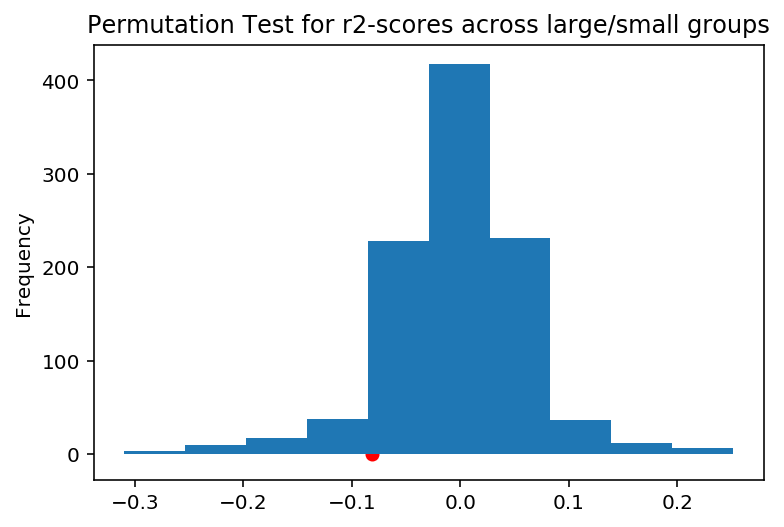

In [104]:
print(pd.Series(metrs <= obs).mean())
pd.Series(metrs).plot(kind='hist', title='Permutation Test for r2-scores across large/small groups')
plt.scatter(obs, 0, c='r');

Therefore, we cannot reject the null hypothesis. The distributions of r2-scores for large and small groups are similar.